# 🐦💬 **PUBLIC SENTIMENTAL ANALYSIS OF TWEETS ABOUT APPLE AND GOOGLE PRODUCTS USING `NLP`**  

## **Business Understanding**
###  Business overview:
A *Tweet* is a short  message shared by users on  **Twitter**(*now known as X*) expressing their opinions, experiences, or reactions towards  events, products, and brands. Tweets can include  texts, images, videos, and links.
In this project, we focus on analysing tweets about `APPLE` and `GOOGLE` products. The dataset, provided by **Crowdflower via Data.world**, contains over 9000 tweets labeled by human raters as positive, negative, or neutral in sentiment. The primary objective of this project is to  develop a Natural Language Processing model  that can automatically identify tweets based on their text. 

## **Stake Holders**
* APPLE and GOOGLE Management Team

## **Problem Statement**
* Users frequently share their views and experiences about Apple and Google products on Twitter. However, the massive volume of tweets makes it challenging to assess the general public sentiment manually. A system that can automatically detect whether a tweet is positive, negative, or neutral would make this process easier and faster.

## **Business Objectives**
### Main Objective: 
*  The main goal of this project is to build an `NLP` model that can rate the sentiment of a Tweet based on its content.

### Specific objectives:
1. To compare the distribution of positive  and negative sentiments in tweets about Apple and Google products.
2. To build and refine an NLP sentiment model, beginning with binary classification and later expanding to Multiclass, evaluated using appropriate performance metrics.
3. To evaluate the model’s predictions and interpret sentiment trends to draw meaningful business insights.


## **Reasearch Questions**
1. Which of these two companies, Apple or Google, receives more positive or negative sentiment in tweets?
2. How does expanding a sentiment model from binary to multiclass classification affect its accuracy and ability to capture real public sentiment?
3. How accurately can the model predict tweet sentiments, and what do the results reveal about public perceptions of Apple and Google products?


## **Project Goals**
* To develop an effective Natural Language Processing (NLP) model capable of automatically determining the sentiment expressed in tweets about Apple and Google products.
* To analyze and interpret public sentiment trends toward Apple and Google to provide meaningful insights that can support brand perception and marketing decisions.


## **Success Criteria**
* Model performance: The NLP model achieves a high level of accuracy and reliability in classifying tweet sentiments (positive, negative, and neutral)
* Actionable insight: The analysis provides clear, data-driven insights into public perceptions of Apple and Google products.



## **Data Understanding**
### Data source and Description:
* **source**: This data is  from CrowdFlower. It is publicly available for use in data science projects. For more information about the data, follow this publicly hosted link[data.world](https://data.world/crowdflower)
*  **Description**:  The dataset  contains Twitter tweets  from users about Apple and Google products. It includes 3 features and 9093 records. Our target is to predict the sentiment (positive, negative, or neutral) based on the text in each tweet.

| **Feature Name**                                       | **Description**                                                                                                                                                          |
| ------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **tweet_text**                                         | The actual content of the tweet as written by the user. This serves as the main input                                                               for Natural Language Processing (NLP) to determine the expressed sentiment.        |
| **is_there_an_emotion_directed_at_a_brand_or_product** | The target variable indicating whether a tweet expresses a positive, negative, or                                                                  neutral emotion toward a brand or product.                                             |
| **emotion_in_tweet_is_directed_at**                    | Specifies the brand, company, or product that the emotion is directed at (e.g., *Apple,                                                             Google, iPhone, Android*). This helps in comparing sentiment between brands.     |                                             |


  

## Data Loading and Exploration 
###  Import neccessary libraries for the project:


In [4]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk # natural language toolkit
import re # regular expressions
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [5]:
# NlTK necessary tools 
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

 Downloading  NLTK data resources later to use later: tokenizers, stopwords, WordNet lemmatizer resources, and the Gutenberg corpus.

* punkt — required by word_tokenize.

* stopwords — provides the English stopword list.

* wordnet & omw-1.4 — needed for WordNetLemmatizer.

## Data Exploration 

In [8]:
# Loading the dataset
Tweets_df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding = 'latin' )
Tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


### Data exploring class

In [10]:
class Data_exploring:
    # A class for exploring and understanding a preloaded tweet dataset.
    
    def __init__(self, Tweets_df: pd.DataFrame):
        # This initializes the dataframe.
        self.df = Tweets_df
        
    def data_overview(self):
        # Brings and info / basic summary of the dataset.
        print("Tweets_df basic overview")
        print(self.df.info())
        
    def Missing_value_check(self):
        # Check for missing values in the data.
        print("Missing values summary")
        print(self.df.isnull().sum())
        
    def Duplicated_values_check(self):
        # Checks for duplicated values in the dataset.
        print("Duplicated values summary")
        print(self.df.duplicated().sum())
        
    def sentiment_distribution(self):
        # Analyzes and visualizes the distribution of sentiments.
        sentiment_col = 'is_there_an_emotion_directed_at_a_brand_or_product'
        
        if sentiment_col in self.df.columns:
            print('Sentiment column counts')
            print(self.df[sentiment_col].value_counts())
            
            # Visualization
            plt.figure(figsize=(7, 5))
            sns.countplot(
                y=sentiment_col,
                data=self.df,
                order=self.df[sentiment_col].value_counts().index,
                palette="viridis"
            )
            plt.title("Distribution of Tweet Sentiments")
            plt.xlabel("Count")
            plt.ylabel("Sentiment Type")
            plt.show()
        else:
            print(f"Column '{sentiment_col}' not found in dataset.")


In [11]:
EDA = Data_exploring(Tweets_df)
EDA

In [12]:
EDA.data_overview()

Tweets_df basic overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


In [13]:
EDA.Missing_value_check()

Missing values summary
tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


In [14]:
EDA.Duplicated_values_check()

Duplicated values summary
22


Sentiment column counts
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


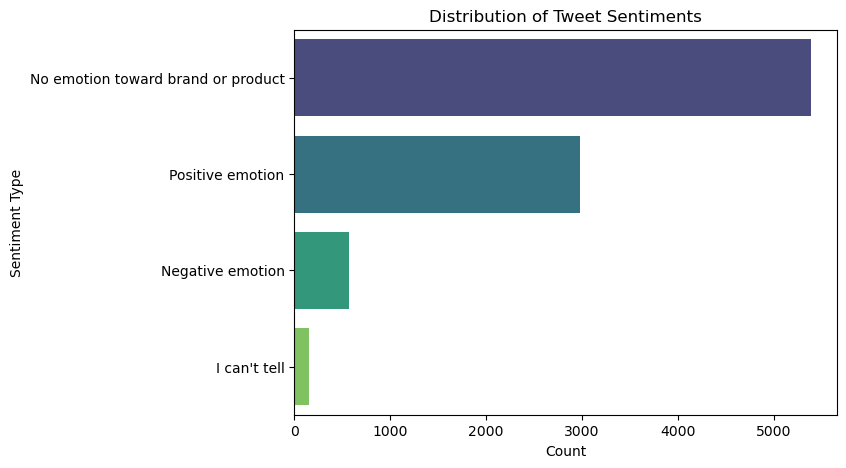

In [15]:
EDA.sentiment_distribution()

* The data sets nedds further cleaning since, it has  22(duplicates), the `emotion_in_tweet_is_directed_at` columns as 5802 missing values and the`tweet_text` test has 1 missing value.
*  So far, the data cannot be used for modelling since it's not ready. Let's implement the cleaning and preprocessing methods for it to be fit for modelling. 

## Data Cleaning and preprocessing.

### Data cleaning class and preprocessing class

In [19]:
class Data_cleaning_and_preprocessing:
    
    def __init__(self, Tweets_df:pd.DataFrame, text_column: str, brand_column:str = None, sentiment_column:str =None):
        # Initializes the dataframe 
        
        self.df = Tweets_df.copy()
        self.text_column = text_column
        self.brand_column = brand_column
        self.sentiment_column = sentiment_column
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words("english"))

    # -------------Basic cleaning-------------------
    def remove_duplicates(self):
        # removes the duplicates from the dataset
        
        self.df.drop_duplicates(inplace = True)
        print("After duplicates removal")
        print(self.df.duplicated().any())
        
    def handling_missing_values(self, text_column, sec_column = None):
        # fills and drops the subset of columns 
        before = len(self.df)
        
        # Drop the row with a missing value on the tweet text col
        self.df = self.df.dropna(subset=[text_column])
        
        # this fills the column of emotion_in_tweet_is_directed_at with 'unkonwn'
        if sec_column:
            missing_before = self.df[sec_column].isna().sum()
            self.df[sec_column] = self.df[sec_column].fillna("Unknown")
            missing_after = self.df[sec_column].isna().sum()
        after = len(self.df)
        print("Remaining missing values summary:")
        print(self.df.isnull().sum().any())
        
        #-------------------Text preprocessing---------------
    def Clean_text(self, text_column):
        # this cleans by lowercasing words and removing non-word items from the  tweets_text_cl
        
        def clean(tweet):
            tweet = tweet.lower().strip()                          # Lowercase
            tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet)  # URLs
            tweet = re.sub(r"@\w+", '', tweet)                     # Mentions
            tweet = re.sub(r"#", '', tweet)                        # Hashtags
            tweet = re.sub(r"[^A-Za-z\s]", '', tweet)              # Non-alphabetic char
            return tweet
        
        self.df[text_column] = self.df[text_column].apply(clean)
        print("Cleaning text complete...")
        
        # example  with no  non-word items
        print("Example of cleaned text (index 0):")
        print(self.df[text_column].iloc[0])
        
        
    def tokenize_text(self):
        # separates words in text_col
        
        print("Tokenizing tweets...")
        self.df['tokens'] = self.df[self.text_column].apply(lambda x: word_tokenize(x))
        print("Tokenization complete.")
        
        # example  of tokenized texts
        print("Example of tokenized text (index 0):")
        print(self.df['tokens'].iloc[0])
        
    def remove_stopwords(self):
        # Remove English stopwords from tokenized text.
        
        print("Removing stopwords...")
        # count before 
        before = self.df['tokens'].apply(len).sum()
        
        self.df['tokens'] = self.df['tokens'].apply(
            lambda x: [word for word in x if word.isalpha() and word not in self.stop_words]
        )
        print("Stopword removal complete.")
        
        #count after stop word removal
        after = self.df['tokens'].apply(len).sum()
        
        # calculate words removed 
        removed_words = before - after
        print(f"Total tokens before: {before:,}")
        print(f"Total tokens after: {after:,}")
        print(f"Tokens removed: {removed_words:,}")
        
    def lemmatize_tokens(self):
        # Lemmatize each word in the tokenized text.
        
        print("Lemmatizing tokens...")
        self.df['tokens'] = self.df['tokens'].apply(
            lambda x: [self.lemmatizer.lemmatize(word) for word in x]
        )
        print("Lemmatization complete.")
        
        # example  of lemmatized  tokens
        print("Example of lemmatized tokens (index 0):")
        print(self.df['tokens'].iloc[0])
        
    # ------------ a bit of visuals------------------
    def plot_tweet_length_distribution(self):
        # Plot the distribution of tweet lengths.
        
        self.df['tweet_length'] = self.df[self.text_column].apply(lambda x: len(x))
        plt.figure(figsize=(11, 7))
        sns.histplot(self.df['tweet_length'], bins=30, kde = True, color = 'blue')
        plt.title("Distribution of Tweet Lengths (with Kde)")
        plt.xlabel("Tweet Length (characters)")
        plt.ylabel("Frequency")
        plt.show()

    def plot_word_frequency(self, top_n=15):
        # Plot the most frequent words after preprocessing.
        
        all_words = [word for tokens in self.df['tokens'] for word in tokens]
        common_words = Counter(all_words).most_common(top_n)
        freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
        plt.figure(figsize=(11, 6))
        sns.barplot(data=freq_df, x='Frequency', y='Word', palette='mako')
        plt.title(f"Top {top_n} Most Frequent Words")
        plt.show()

    
    def get_processed_data(self):
        # Return the preprocessed DataFrame.
        
        return self.df

In [20]:
# set the class in use 
cleaner = Data_cleaning_and_preprocessing(
    Tweets_df= Tweets_df,
    text_column='tweet_text',
    brand_column='emotion_in_tweet_is_directed_at',
    sentiment_column='is_there_an_emotion_directed_at_a_brand_or_product'
)


In [21]:
# handling duplicates
cleaner.remove_duplicates()

After duplicates removal
False


In [22]:
# handling missing val
cleaner.handling_missing_values(text_column='tweet_text', sec_column='emotion_in_tweet_is_directed_at')


Remaining missing values summary:
False


In [23]:
# make the texts lowercase and remove non-words
cleaner.Clean_text("tweet_text")


Cleaning text complete...
Example of cleaned text (index 0):
 i have a g iphone after  hrs tweeting at riseaustin it was dead  i need to upgrade plugin stations at sxsw


In [24]:
# Tokenize the data
cleaner.tokenize_text()


Tokenizing tweets...
Tokenization complete.
Example of tokenized text (index 0):
['i', 'have', 'a', 'g', 'iphone', 'after', 'hrs', 'tweeting', 'at', 'riseaustin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', 'sxsw']


In [25]:
# remove stop words 
cleaner.remove_stopwords()


Removing stopwords...
Stopword removal complete.
Total tokens before: 149,603
Total tokens after: 102,175
Tokens removed: 47,428


In [26]:
# lemmatize  the tokens
cleaner.lemmatize_tokens()

Lemmatizing tokens...
Lemmatization complete.
Example of lemmatized tokens (index 0):
['g', 'iphone', 'hr', 'tweeting', 'riseaustin', 'dead', 'need', 'upgrade', 'plugin', 'station', 'sxsw']


## Visualizations


### Bivariate and Multivariate analysis mostly in action

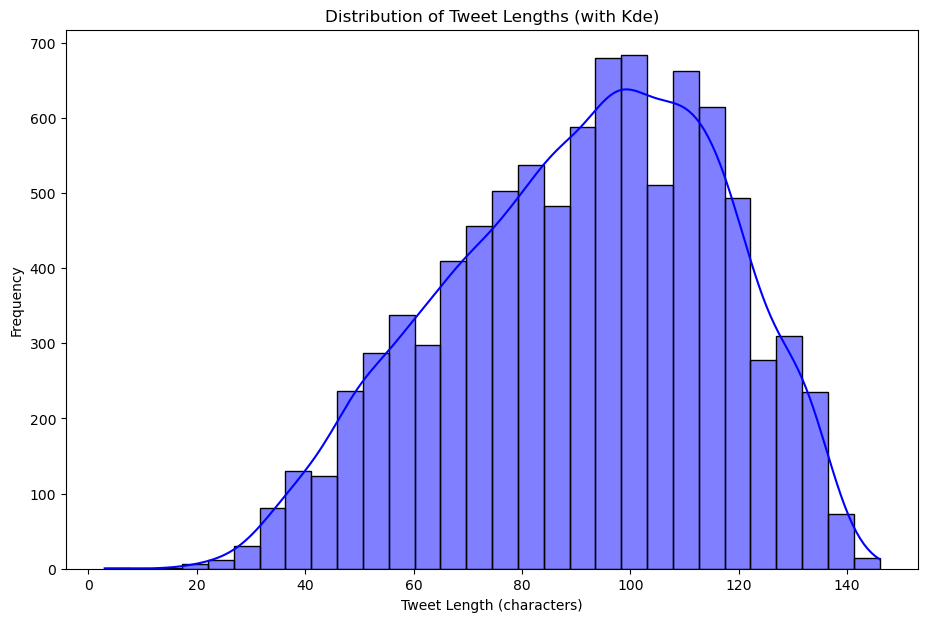

In [28]:
# A hist plot showing the length of the tweets.
cleaner.plot_tweet_length_distribution()

* The distribution of tweets lengths is slightly right-skewed, indicating that most tweets are moderately short(between 80 - 120 characters)
* This explains that twitter users  often express opinions concisely but occasionally write longer posts when elaborating on product experiences.


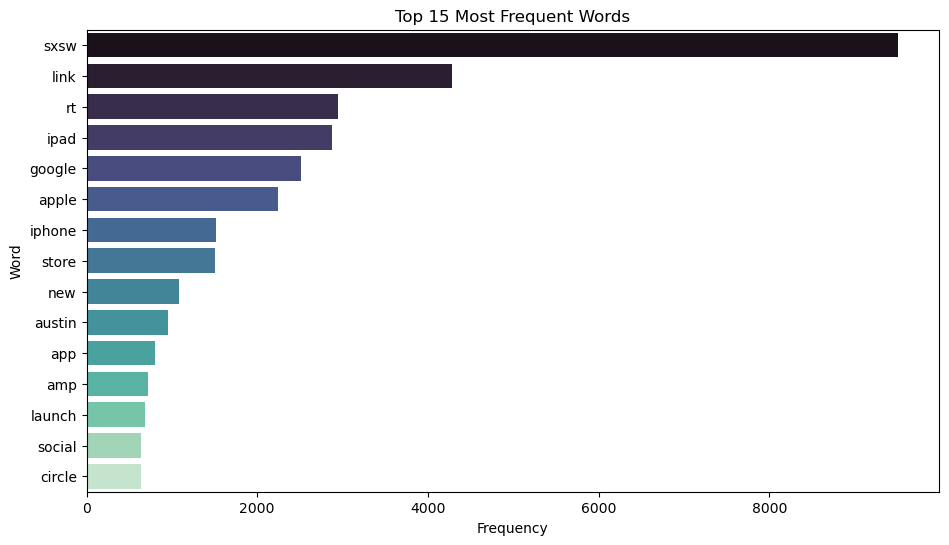

In [30]:
from collections import Counter
cleaner.plot_word_frequency(top_n=15)


In [31]:
# Dataset Half way cleaned 
processed_df = cleaner.get_processed_data()
processed_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tokens,tweet_length
0,i have a g iphone after hrs tweeting at rise...,iPhone,Negative emotion,"[g, iphone, hr, tweeting, riseaustin, dead, ne...",107
1,know about awesome ipadiphone app that youl...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely...",115
2,can not wait for ipad also they should sale ...,iPad,Positive emotion,"[wait, ipad, also, sale, sxsw]",63
3,i hope this years festival isnt as crashy as ...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph...",72
4,great stuff on fri sxsw marissa mayer google ...,Google,Positive emotion,"[great, stuff, fri, sxsw, marissa, mayer, goog...",108


* **The data looks better form the previous one. We now have to do some feature engineering that  will lead to more cleaning of this dataframe.**  

## Feature engineering

### Feature engineering class:
* This class contains Mapping of sentiments to three categories  which are (`Positive_emotion`, `Negative_ emotion`, `Neutral/No_emotion`.)
* It also contains the brand mapping  of the `emotion_in_tweet_is_directed_at` column  for more clarity.
* it also contains visuals of the actions taken.

In [35]:
processed_df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
Unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [36]:
class Feature_Engineering:
    
    def __init__(self, df: pd.DataFrame, text_col: str, brand_col: str, sentiment_col: str):
        self.df = df.copy()
        self.text_col = text_col
        self.brand_col = brand_col
        self.sentiment_col = sentiment_col

    # Sentiment Mapping
    def map_sentiments(self):
        sentiment_mapping = {
            'Positive emotion': 'Positive',
            'Negative emotion': 'Negative',
            "I can't tell": 'Neutral/No emotion',
            'No emotion toward brand or product': 'Neutral/No emotion'
        }
        self.df['mapped_sentiment'] = self.df[self.sentiment_col].map(sentiment_mapping)
        print("Sentiment mapping complete....")
        display(self.df[[self.sentiment_col, 'mapped_sentiment']].head(10))

    # Brand Mapping
    def map_brands(self):
        brand_mapping = {
            'iPad': 'Apple',
            'Apple': 'Apple',
            'iPad or iPhone App': 'Apple',
            'iPhone': 'Apple',
            'Other Apple product or service': 'Apple',
            'Google': 'Google',
            'Other Google product or service': 'Google',
            'Android App': 'Google',
            'Android': 'Google',
            'Unknown': 'Unknown'
        }
        # clean and normalize before mapping
        self.df[self.brand_col] = self.df[self.brand_col].astype(str).str.strip()
        # map
        self.df['mapped_brand'] = self.df[self.brand_col].map(brand_mapping)
        
        print("Brand mapping complete.")
        print("Brand distribution after mapping:")
        print(self.df['mapped_brand'].value_counts())
        
        display(self.df[[self.brand_col, 'mapped_brand']].head(10))
        

    # Text Feature Visualizations

    # Sentiment & Brand Visualizations
    def plot_sentiment_distribution(self):
        plt.figure(figsize=(11, 6))
        sns.countplot(data=self.df, x='mapped_sentiment', order=self.df['mapped_sentiment'].value_counts().index)
        plt.title("Distribution of Sentiment Categories")
        plt.xlabel("Sentiment Type")
        plt.ylabel("Tweet Count")
        plt.show()

    def plot_brand_distribution(self):
        plt.figure(figsize=(8, 5))
        sns.countplot(data=self.df, x='mapped_brand', order=self.df['mapped_brand'].value_counts().index)
        plt.title("Distribution of Brand Mentions (Apple vs Google)")
        plt.xlabel("Brand")
        plt.ylabel("Tweet Count")
        plt.show()

    # Combined Brand vs Sentiment Plot
    def plot_brand_sentiment_comparison(self):
        """Compare brand mentions by sentiment category."""
        plt.figure(figsize=(10, 6))
        sns.countplot(data=self.df, x='mapped_brand', hue='mapped_sentiment', palette='cool')
        plt.title("Brand Mentions by Sentiment (Apple vs Google)")
        plt.xlabel("Brand")
        plt.ylabel("Count")
        plt.legend(title="Sentiment")
        plt.show()
        #having removed the Unkown cartegory
    def plot_brand_sentiment_comparison_no_Unknown(self):

        filtered_df = self.df[self.df['mapped_brand'] != 'Unknown']
        plt.figure(figsize=(10, 6))
        sns.countplot(
        data=filtered_df,
        x='mapped_brand',
        hue='mapped_sentiment',
        palette='cool'
        )
        plt.title("Brand Mentions by Sentiment (Apple vs Google)")
        plt.xlabel("Brand")
        plt.ylabel("Count")
        plt.legend(title="Sentiment")
        plt.show()

    # Return processed data
    def get_features(self):
        # Return the processed DataFrame for modeling.
        return self.df


In [37]:
# Class in use 
# Initialize the class
features = Feature_Engineering(
    df=cleaner.get_processed_data(),
    text_col='tweet_text',
    brand_col='emotion_in_tweet_is_directed_at',
    sentiment_col='is_there_an_emotion_directed_at_a_brand_or_product'
)


In [38]:
# Run transformation
# Sentiment mappings 
features.map_sentiments()


Sentiment mapping complete....


,is_there_an_emotion_directed_at_a_brand_or_product,mapped_sentiment
0,Negative emotion,Negative
1,Positive emotion,Positive
2,Positive emotion,Positive
3,Negative emotion,Negative
4,Positive emotion,Positive
5,No emotion toward brand or product,Neutral/No emotion
7,Positive emotion,Positive
8,Positive emotion,Positive
9,Positive emotion,Positive
10,Positive emotion,Positive


In [39]:
# Brand mapping 
features.map_brands()


Brand mapping complete.
Brand distribution after mapping:
mapped_brand
Unknown    5788
Apple      2404
Google      878
Name: count, dtype: int64


,emotion_in_tweet_is_directed_at,mapped_brand
0,iPhone,Apple
1,iPad or iPhone App,Apple
2,iPad,Apple
3,iPad or iPhone App,Apple
4,Google,Google
5,Unknown,Unknown
7,Android,Google
8,iPad or iPhone App,Apple
9,Apple,Apple
10,Android,Google


## Visualize 

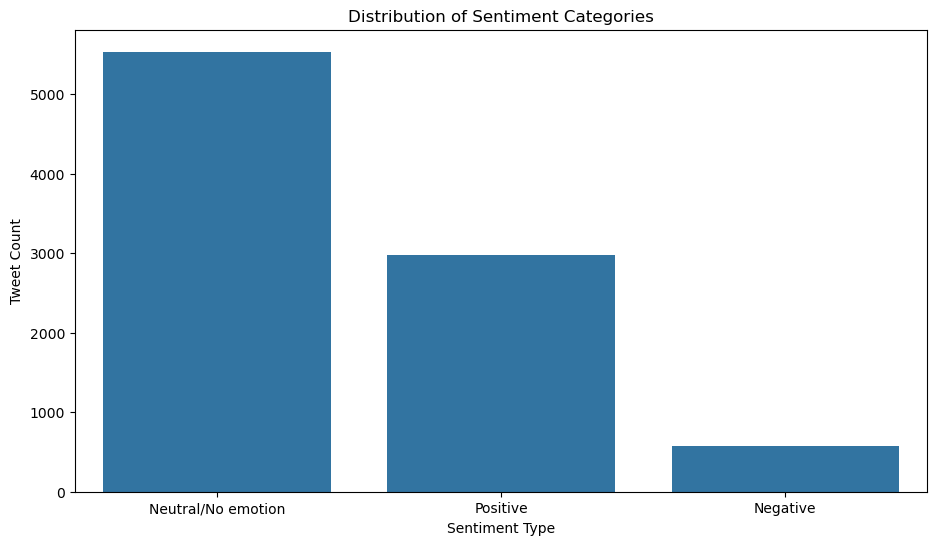

In [41]:
# sentiment Mapping visualization
features.plot_sentiment_distribution()


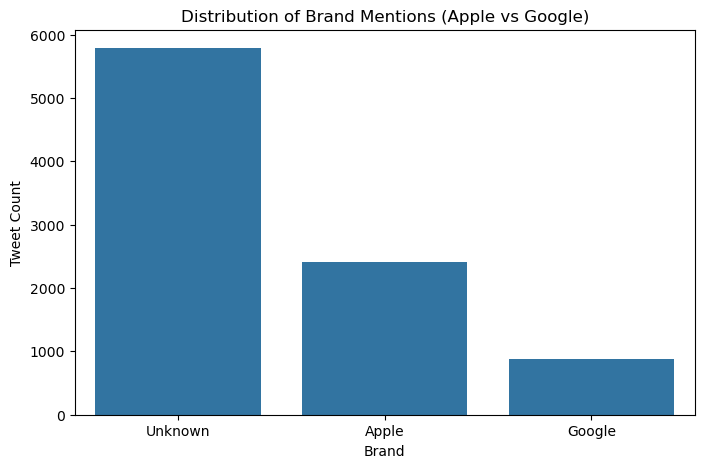

In [42]:
# Branding  mapping visualization
features.plot_brand_distribution()


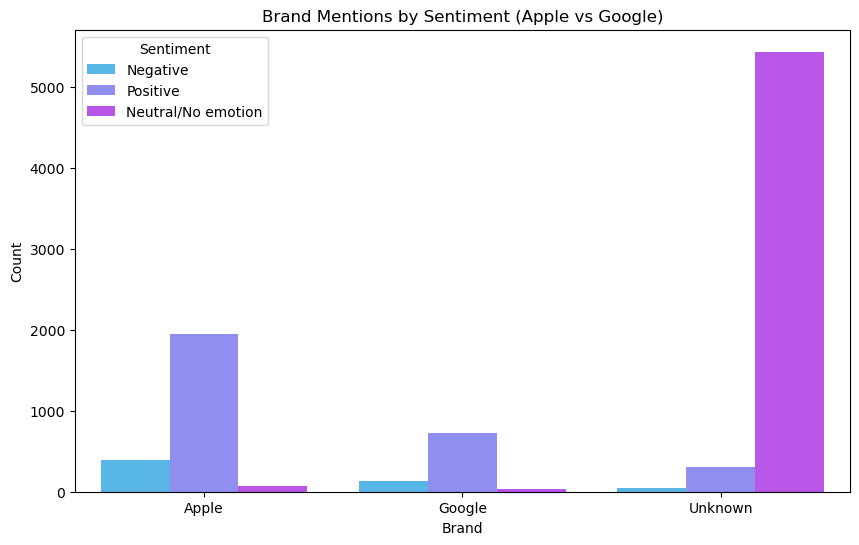

In [43]:
# comparison of the two 
features.plot_brand_sentiment_comparison()


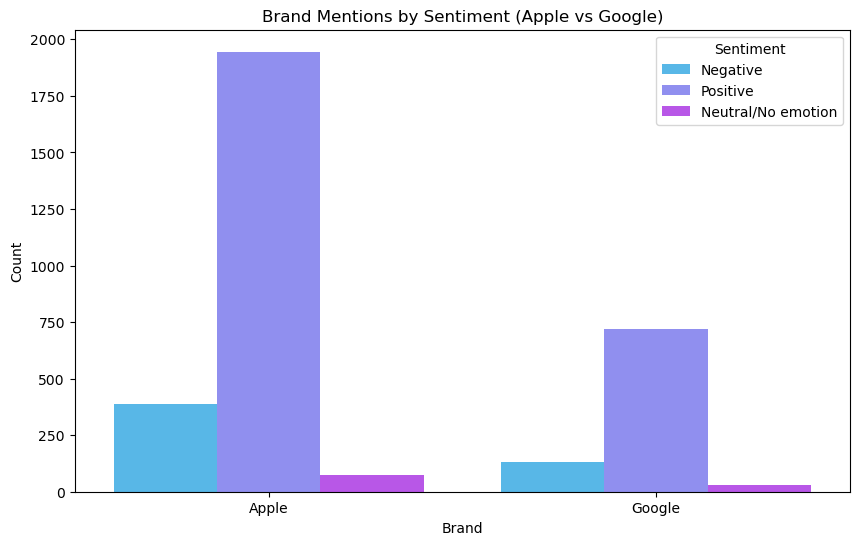

In [44]:
features.plot_brand_sentiment_comparison_no_Unknown()

In [45]:
# Get the updated DataFrame
final_df = features.get_features()
final_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tokens,tweet_length,mapped_sentiment,mapped_brand
0,i have a g iphone after hrs tweeting at rise...,iPhone,Negative emotion,"[g, iphone, hr, tweeting, riseaustin, dead, ne...",107,Negative,Apple
1,know about awesome ipadiphone app that youl...,iPad or iPhone App,Positive emotion,"[know, awesome, ipadiphone, app, youll, likely...",115,Positive,Apple
2,can not wait for ipad also they should sale ...,iPad,Positive emotion,"[wait, ipad, also, sale, sxsw]",63,Positive,Apple
3,i hope this years festival isnt as crashy as ...,iPad or iPhone App,Negative emotion,"[hope, year, festival, isnt, crashy, year, iph...",72,Negative,Apple
4,great stuff on fri sxsw marissa mayer google ...,Google,Positive emotion,"[great, stuff, fri, sxsw, marissa, mayer, goog...",108,Positive,Google


So  close to winning...
* The tokens are in Unigram format and  for a model to understand and make predictions properly, the   the tokens should  be bigrams.

 ## BI GRAMS 

## VECTORIZATION OF DATA 